# Binary text classification using embedding
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

## Read in our text corpus

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
from sklearn.datasets import fetch_20newsgroups

# list all 20 categories
fetch_20newsgroups(subset='train').target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
# select just two of the categories of text
categories = [
    "talk.politics.misc",
    "talk.religion.misc",
]

dataset = fetch_20newsgroups(subset='all',
                             categories=categories,
                             shuffle=True,
                             random_state=42,
                             remove=("headers", "footers", "quotes"),
                             return_X_y = False
                            )

In [10]:
corpus, y = dataset.data, dataset.target

### Take a look at one of the texts (here the first document)

In [11]:
corpus[0]

'\n\n      Perhaps I failed to make myself clear:  Minorities in the U.S.\n*correlate* with poverty.  This isn\'t good and we should address it,\nbut we shouldnt\' ignore that minorities and poverty *do* tend to go\ntogether.\n\n      *Does* Vancouver have a consistantly poor population drawn along\nracial lines?  If it doesn\'t, then assumptions of being able to compare\nminority vs. majority in both cities is questionable at best.\n\n\n       If the *rate* of increase over a period of several years remains\nunchanged, or increases, I think it\'s not a far jump to say that the laws\nare not effective.  No, you can\'t sit down and say that things wouldn\'t\nhave been worse.  I don\'t have a crystal ball and neither do you.  However,\nthat road leads us to a place where it is impossible to critique *any*\naction.  If it gets down to be, "It might have been worse without them,"\nthen there *is* no valid objection, which I\'m sure would amuse certain\npeople to no end.\n\n\n       So we\'

### Vectorize using embeddings from [`en_core_web_md`](https://spacy.io/models/en/#en_core_web_md) by [spaCy](https://spacy.io/)

In [12]:
import spacy

#!python -m spacy download en_core_web_sm
#nlp = spacy.load("en_core_web_sm")  # English small model

!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")  # English medium model with 20k unique vectors

#!python -m spacy download en_core_web_lg
#nlp = spacy.load("en_core_web_lg")  # English large model with 685k unique vectors

vectors = [nlp(document).vector.reshape(1,-1) for document in tqdm( corpus )]
X = np.concatenate(vectors)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 57.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


100%|██████████| 1403/1403 [01:30<00:00, 15.49it/s]


we see that the vectors created by `spaCy` are 300 dimensional (!)

In [13]:
X.shape[1]

300

### Create a validation set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

### Our estimator

In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

### Fit and predict

In [16]:
classifier.fit(X_train, y_train)

#y_pred = classifier.predict_proba(X_test)[:,1]
y_pred = classifier.predict(X_test)

## Results

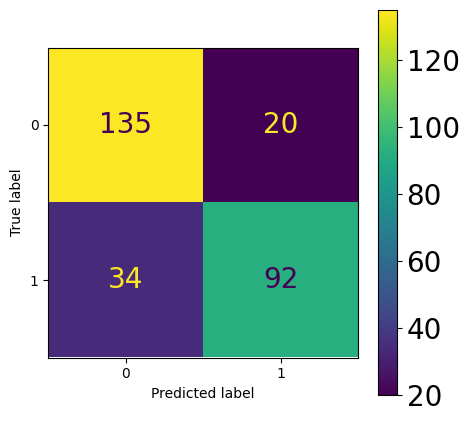

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# plot
fig, ax = plt.subplots(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.rcParams.update({'font.size': 20})
disp.plot(ax=ax);

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8078291814946619


In [19]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred))

0.610610982972577
